In [133]:
!pip install markdown

# CS210 Individual Project

## Ali Metehan Gencmazlumo
## ID: 19041 

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import reverse_geocoder as rg
from geopy.distance import geodesic
import datetime 
import seaborn as sns
import numpy as np
from scipy import stats
%matplotlib inline

In [99]:
df = pd.read_csv("C:/Users/Mete/Desktop/Cs210/Project/data/taxi-trips.csv")# Reading data


### Basic Data Informations

In [129]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance
count,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000
mean,1.534958,1.657148,-73.973971,40.751392,-73.973538,40.752212,927.186310,2.111257
std,0.498779,1.313844,0.040456,0.027958,0.039192,0.032284,3118.710246,2.408305
min,1.000000,0.000000,-79.487900,40.225803,-79.487900,40.225800,1.000000,0.000000
25%,1.000000,1.000000,-73.991875,40.737835,-73.991394,40.736462,393.000000,0.764199
50%,2.000000,1.000000,-73.981796,40.754501,-73.979759,40.754848,652.000000,1.298477
75%,2.000000,2.000000,-73.967575,40.768471,-73.962990,40.770077,1048.000000,2.379274
max,2.000000,6.000000,-73.425018,41.292198,-73.055977,41.292198,86366.000000,51.985580


In [136]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
pickup_district        object
dropoff_district       object
distance              float64
time_of_day            object
dtype: object

In [137]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_district', 'dropoff_district', 'distance',
       'time_of_day'],
      dtype='object')

In [ ]:
pick_list = list(zip(df["pickup_latitude"], df["pickup_longitude"])) #Creating tuple list for pick up coordinates
drop_list = list(zip(df["dropoff_latitude"], df["dropoff_longitude"]))

In [100]:
pick_search_result = rg.sea+rch(pick_list)
drop_search_result = rg.search(drop_list)

In [101]:
pick_names = list()
drop_names = list()
for p in pick_search_result:
    pick_names.append(p["name"])
for d in drop_search_result:
    drop_names.append(d["name"])

In [102]:
df["pickup_district"] = pick_names
df["dropoff_district"] = drop_names

#### Top 5 districts where passengers prefer to leave

In [103]:
df['pickup_district'].value_counts()[0:5]

Manhattan           45329
New York City       34625
Long Island City    17787
Weehawken           11334
The Bronx            2777
Name: pickup_district, dtype: int64

#### Top 5 districts where passengers prefer to arrive

In [104]:
df['dropoff_district'].value_counts()[0:5]

Manhattan           44478
New York City       31082
Long Island City    19919
Weehawken           10621
Brooklyn             2059
Name: dropoff_district, dtype: int64

In [105]:
distances = list()
for i in range(0,len(pick_list)):
    distances.append(geodesic(pick_list[i], drop_list[i]).miles)

In [106]:
df["distance"] = distances

In [107]:
def assign_time_of_day(date_time):
    t = datetime.datetime.strptime(date_time, '%Y-%m-%d %H:%M:%S').time()
    zero = datetime.datetime.strptime('00:00:00', '%H:%M:%S').time()
    zero_before = datetime.datetime.strptime('23:59:59', '%H:%M:%S').time()
    am6 = datetime.datetime.strptime('06:00:00', '%H:%M:%S').time()
    am7 = datetime.datetime.strptime('07:00:00', '%H:%M:%S').time()
    am9 = datetime.datetime.strptime('09:00:00', '%H:%M:%S').time()
    pm4 = datetime.datetime.strptime('16:00:00', '%H:%M:%S').time()
    pm6 = datetime.datetime.strptime('18:00:00', '%H:%M:%S').time()
    pm11 = datetime.datetime.strptime('23:00:00', '%H:%M:%S').time()
    
    if t >= zero and t < am7:
        return "late_night"
    elif t >= am7 and t < am9:
        return "rush_hour_morning"
    elif t >= am9 and t < pm4:
        return "afternoon"
    elif t >= pm4 and t < pm6:
        return "rush_hour_evening"
    elif t >= pm6 and t < pm11:
        return "evening"
    elif t >= pm11 and t <= zero_before:
        return "late_night"
    else:
        return "none"

In [108]:
df["time_of_day"] = df["pickup_datetime"].apply(assign_time_of_day)

In [109]:
df.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance,time_of_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,0.933406,rush_hour_evening
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,3.178194,evening
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,0.928961,rush_hour_morning
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1.228003,afternoon
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,1.562103,afternoon


#### Change of average distance by time of the day

In [110]:
df_steam=df.groupby(by="time_of_day").mean()
df_steam["distance"]


time_of_day
afternoon            1.932456
evening              2.099076
late_night           2.558580
rush_hour_evening    2.077128
rush_hour_morning    1.943823
Name: distance, dtype: float64

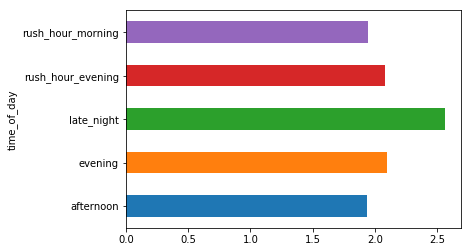

In [111]:

df_steam["distance"].plot(kind="barh")


#### Change of trip duration by time of the day

In [112]:

df_steam["trip_duration"]


time_of_day
afternoon             963.922746
evening               893.595329
late_night            866.095457
rush_hour_evening    1024.494552
rush_hour_morning     918.488716
Name: trip_duration, dtype: float64

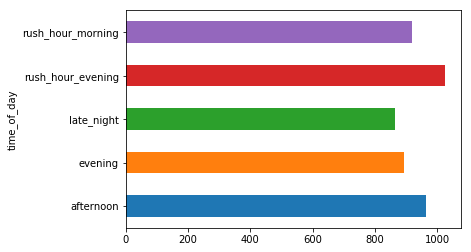

In [113]:
df_steam["trip_duration"].plot(kind="barh")

## Hypothesis Testing 

#### Test 1 : • Null hypothesis: passenger group size has no effect on the distance.

In [120]:
dftest2=df.loc[df["passenger_count"] >1] # groupsize bigger than 1 

In [124]:
dftest1=df.loc[df["passenger_count"] == 1] # groupsize is 1 

In [128]:
stats.ttest_ind(dftest1["distance"],dftest2["distance"], equal_var=False)

Ttest_indResult(statistic=-4.903362110492197, pvalue=9.445117080447406e-07)

##### If we set the significance level as 0.05, we can reject the null hypothesis.Which means groupsize does effect on the distance

#### Test 2 : • Null hypothesis: The day of the week has no effect on the distance.

In [140]:
df["days"]=pd.to_datetime(df['pickup_datetime']).dt.weekday_name

In [141]:
df.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance,time_of_day,days
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,0.933406,rush_hour_evening,Monday
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,3.178194,evening,Thursday
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,0.928961,rush_hour_morning,Friday
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1.228003,afternoon,Monday
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,1.562103,afternoon,Monday


In [148]:
dfmonday=df.loc[df["days"]=="Monday"]
dftuesday=df.loc[df["days"]=="Tuesday"]
dfwed=df.loc[df["days"]=="Wednesday"]
dfthursday=df.loc[df["days"]=="Thursday"]
dffri=df.loc[df["days"]=="Friday"]

dfweekdays = pd.concat([dfmonday, dftuesday,dfwed,dfthursday,dffri]) 


In [149]:
dfsat=df.loc[df["days"]=="Saturday"]
dfsun=df.loc[df["days"]=="Sunday"]
dfweekends=pd.concat([dfsun,dfsat])

In [150]:
stats.ttest_ind(dfweekdays["trip_duration"],dfweekends["trip_duration"], equal_var=False)

Ttest_indResult(statistic=2.361713377689828, pvalue=0.018193740149220382)

#### If we set the significance level as 0.05, we can accept the null hypothesis.